In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import FancyArrowPatch

# Refueling - No penalties

In [2]:
def payload_i (x,y,beta_i):
    Hi=np.exp(-beta_i *y/x) -x**2 *(1-np.exp(-y/x))
    return Hi



def payload_mission(x,y,sequence):
    assert np.abs(np.sum(sequence)- 1)<1e-6, "Error: The sum of betas must be equal to 1"
    H_list=[]
    for beta_i in sequence:
        H_list.append(payload_i(x,y,beta_i))
    Hm=np.min(H_list)
    return Hm




def time_coeff (x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau


def specific_fuel_cons(x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    Hm=payload_mission(x,y,sequence)
    f=mp_refuel/Hm
    return f

# Refueling - with penalties

In [3]:
def payload_i_penalty(x,y,gamma,beta_i):
    Hi=np.exp(-(beta_i+gamma)*y/x) -x**2 *(1-np.exp(-y/x))
    return Hi



def payload_mission_penalty(x,y,gamma,sequence):
    H_list=[]
    for beta_i in sequence[:-1]:
        H_list.append(payload_i_penalty(x,y,gamma,beta_i))
    H_list.append(payload_i(x,y,sequence[-1]))
        
    Hm=np.min(H_list)
    return Hm




def time_coeff_penalty (x,y,gamma,sequence):
    mp_refuel= np.sum(1-np.exp(-(sequence[:-1]+gamma) *y/x)) + 1-np.exp(-sequence[-1]*y/x)
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau




def specific_fuel_cons_penalty(x,y,gamma,sequence):
    mp_refuel= np.sum(1-np.exp(-(sequence[:-1]+gamma) *y/x)) + 1-np.exp(-sequence[-1]*y/x)
    Hm= payload_mission_penalty(x,y,gamma,sequence)
    f=mp_refuel/Hm
    return f

# Reproduce results without refueling

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_36216/2694802788.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(x_vec,H,linewidth=2,label=f"$\Delta v/v_{{ch}}$ = {y}")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


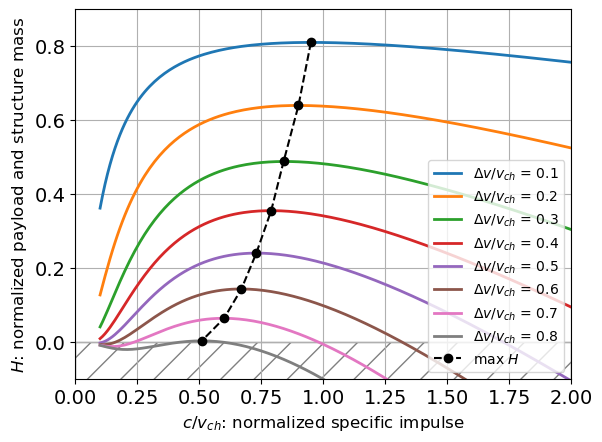

In [4]:
y_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8])
x_vec=np.arange(0.1,2.01,0.01)




max_H=[]
opt_x=[]

fig=plt.plot(figsize=(8,8),dpi=150)
for y in y_vec:
    H=payload_i(x_vec,y,1)
    max_H.append(np.max(H))
    opt_x.append(x_vec[np.argmax(H)])
    plt.plot(x_vec,H,linewidth=2,label=f"$\Delta v/v_{{ch}}$ = {y}")
    # Shade area below H = 0
    
    
    
plt.plot(opt_x,max_H,"ko--",label=f"max $H$")

aa=np.array([-1,-1])
plt.fill_between(np.array([0,2]), aa, where=(aa < 0), color='none', edgecolor='gray', hatch='/', interpolate=True)
    
plt.xlim([0,2])
plt.ylim([-.1,.9])
    
plt.xlabel('$c/v_{ch}$',fontsize=16)  
plt.ylabel('$H$',fontsize=16)   

plt.xlabel('$c/v_{ch}$: normalized specific impulse',fontsize=12)  
plt.ylabel('$H$: normalized payload and structure mass',fontsize=12) 


#plt.title(r'Plot of $H$ vs $c/v_{ch}$ (No refueling)',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/electric/HvsC_No_refueling.eps",bbox_inches='tight')
plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_36216/215276559.py:26: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)


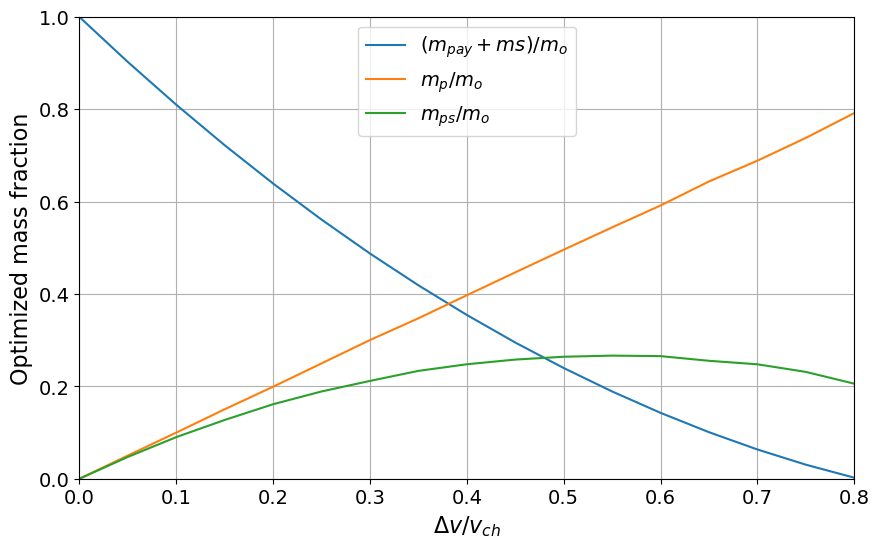

In [5]:
x_vec=np.arange(0.1,2.01,0.01)
y_vec=np.arange(0,0.81,0.05)

max_H=[]
opt_r2=[]
opt_mp=[]
opt_mps=[]
for y in y_vec:
    H=payload_i(x_vec,y,1)
    x_opt=x_vec[np.argmax(H)]
    mp=1-np.exp(-y/x_opt)
    mps=(x_opt**2) *(1-np.exp(-y/x_opt))
    
    max_H.append(np.max(H)) 
    opt_mp.append(np.min(mp))
    opt_mps.append(np.min(mps))
    
fig=plt.figure(figsize=(10,6))    
plt.plot(y_vec,max_H,label=r"$(m_{pay}+m{s})/m_o$")
plt.plot(y_vec,opt_mp,label=r"$m_p/m_o$")
plt.plot(y_vec,opt_mps,label=r"$m_{ps}/m_o$")
 
plt.xlim([0,0.8])   
plt.ylim([0,1])
    
plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)  
plt.ylabel('Optimized mass fraction',fontsize=16)     
plt.legend(loc="best",fontsize=14)  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/electric/fractions_No_refueling.png",bbox_inches='tight')
plt.show()

# Consider refueling without penalty

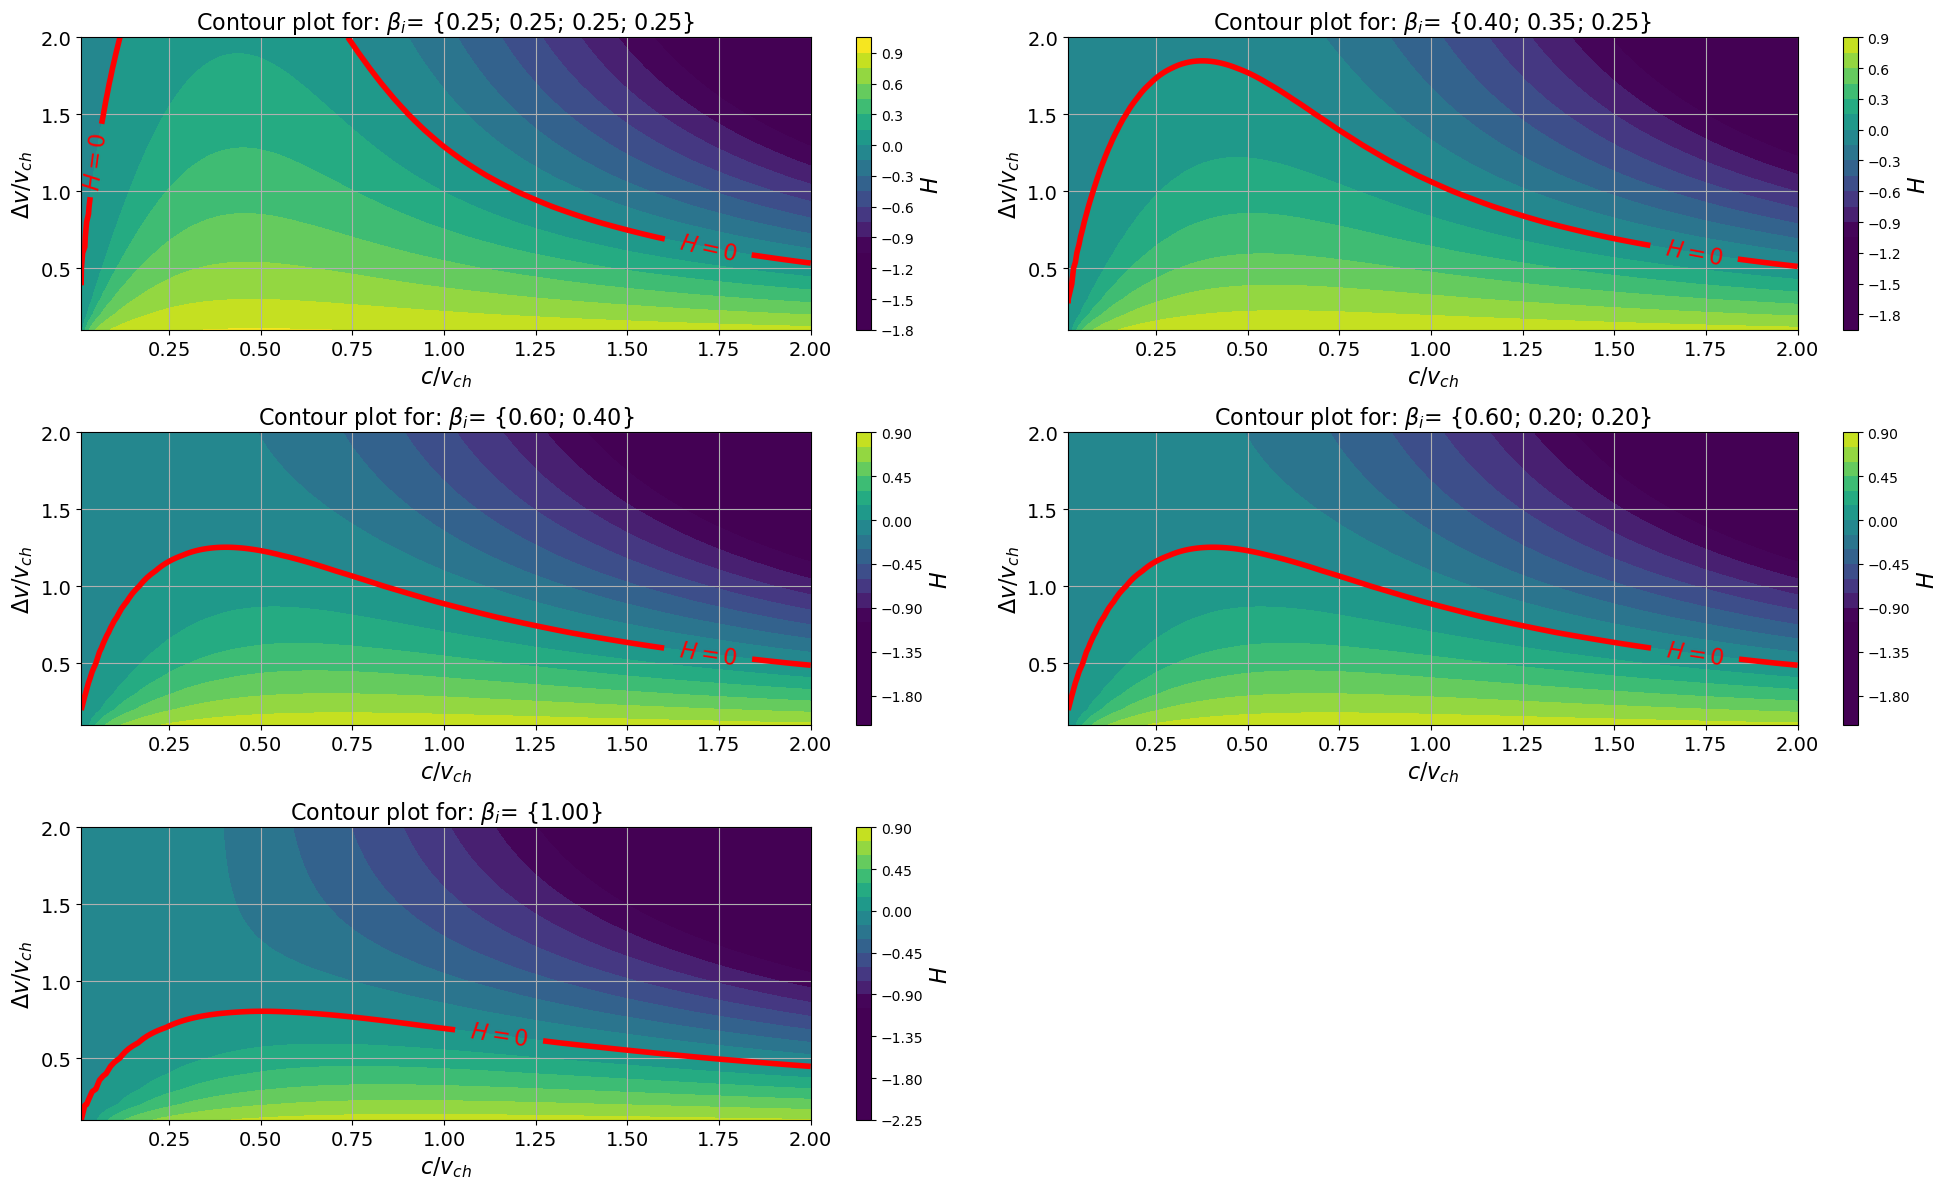

In [6]:
x_vec = np.arange(0.01, 2.01, 0.01)
y_vec = np.arange(0.1, 2.01, 0.1)
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([.6, .2,.2]),
                      np.array([1])))



fig = plt.figure(figsize=(20, 12))

# Add subplots manually
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5) 

axs=[ax1,ax2,ax3,ax4,ax5]

for idx, sequence in enumerate(sequence_list):
    X, Y = np.meshgrid(x_vec, y_vec)
    Hm_values = np.zeros_like(X)

    for i in range(Y.shape[0]):
        for j in range(X.shape[1]):
            Hm_values[i, j] = payload_mission(X[i, j], Y[i, j], sequence)

    ax = axs[idx]

    contour = ax.contourf(X, Y, Hm_values, levels=20, cmap='viridis',vmin=-1, vmax=1)
    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label(r'$H$', fontsize=16)

    # Adding the red line where Hm = 0
    contour_lines = ax.contour(X, Y, Hm_values, levels=[0], colors='red', linewidths=4)
    ax.clabel(contour_lines, inline=True, fontsize=16, fmt=r'$H=0$')

    ax.set_xlabel(r'$c/v_{ch}$', fontsize=16)
    ax.set_ylabel(r'$\Delta v/v_{ch}$', fontsize=16)
    title_str = r'Contour plot for: $\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    ax.set_title(title_str, fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig("figures/electric/contour.png")


plt.show()


<Figure size 1000x600 with 0 Axes>

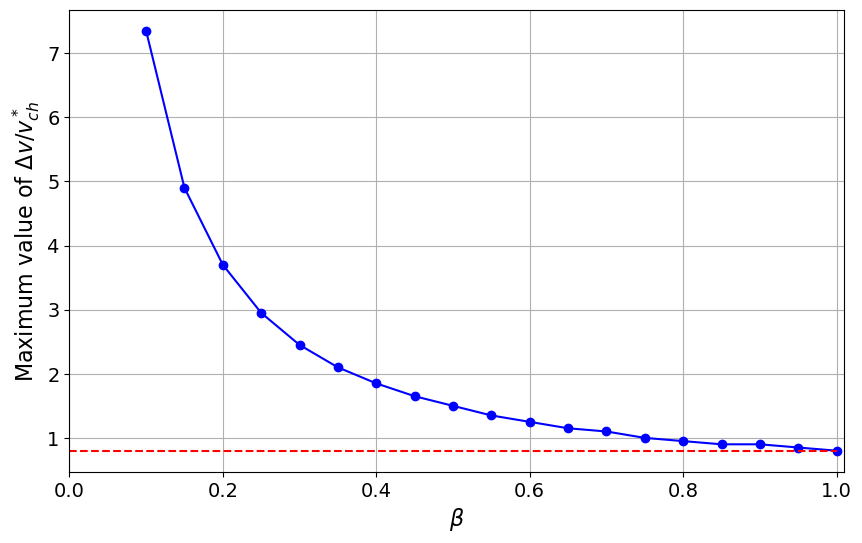

In [7]:
y_vec=np.arange(0,8.1,0.05)
x_vec=np.arange(0.1,2.01,0.01)
beta_vec=np.arange(0.1,1.01,0.05)



r1_closest_to_zero = {}
for beta in beta_vec:
    max_H=[]
    for y in y_vec:
        H=payload_i(x_vec,y,beta)
        max_H.append(np.max(H)) 
    # Find the r1 value where H is closest to 0
    closest_index = np.argmin(np.abs(max_H))
    r1_closest_to_zero[beta] = y_vec[closest_index]
    
    
 # Plot r1_closest_to_zero vs beta
fig=plt.figure(figsize=(10,6)) 
beta_vals = list(r1_closest_to_zero.keys())
r1_vals = list(r1_closest_to_zero.values())

plt.figure(figsize=(10, 6))
plt.plot(beta_vals, r1_vals, 'ob-')
plt.plot(np.array([0,1]),np.array([r1_vals[-1],r1_vals[-1]]),"r--")
plt.xlim([0,1.01])

plt.xlabel(r'$\beta$',fontsize=16)
plt.ylabel(r'Maximum value of $\Delta v/v_{ch}^*$',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig("figures/electric/max_delv.png")

plt.show()

## Find $c_{opt}/v_{ch}$ that maximizes H

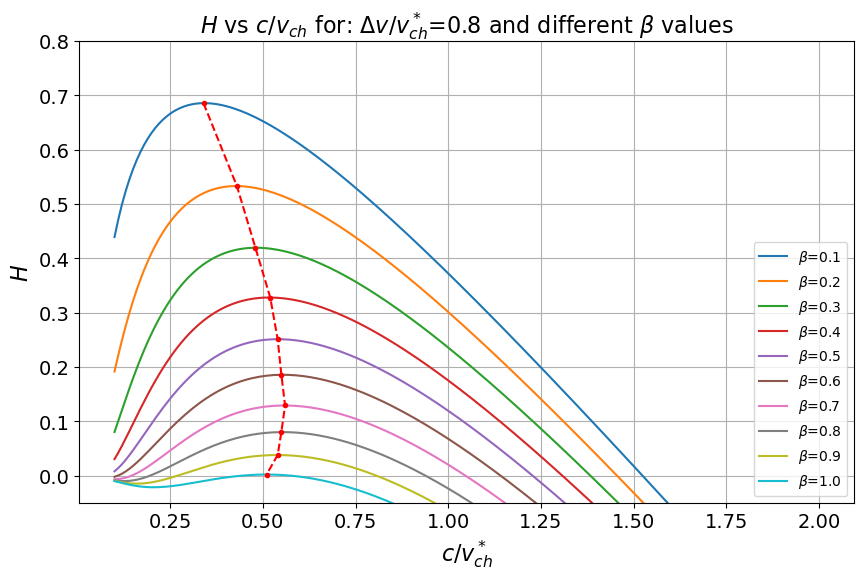

In [8]:
y=0.8
y_vec=np.array([.2,.4,.6,.8])
beta_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])


fig=plt.figure(figsize=(10,6))
max_H=[]
opt_x=[]
for beta in beta_vec:
    H=payload_i(x_vec,y,beta)
    max_H.append(np.max(H))
    opt_x.append(x_vec[np.argmax(H)])
    plt.plot(x_vec,H,label=rf'$\beta$={beta}')
    
    
plt.plot(opt_x,max_H,"r.--")
plt.ylim([-0.05,0.8])
    
plt.xlabel('$c/v_{ch}^*$',fontsize=16)    
plt.ylabel('$H$',fontsize=16)   
plt.title(rf'$H$ vs $c/v_{{ch}}$ for: $\Delta v /v_{{ch}}^*$={y} and different $\beta$ values', fontsize=16)
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/electric/HvsC_refueling.png",bbox_inches='tight')
plt.show()

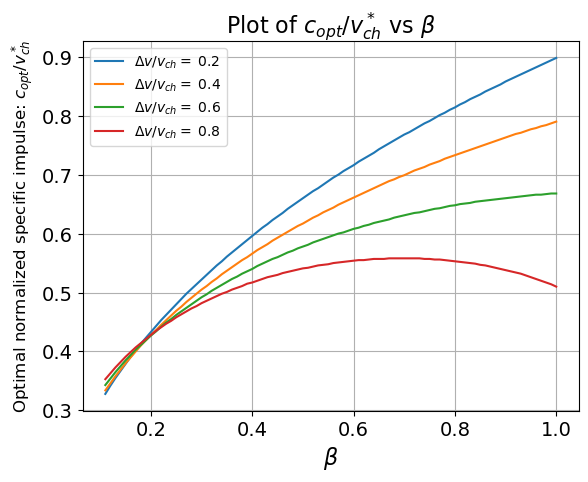

In [9]:
y_vec=np.array([.2,.4,.6,.8])
x_vec=np.arange(0.1,2.01,0.001)
beta_vec=np.arange(1,.1,-0.01)

fig=plt.figure()
for y in y_vec:
    max_H=[]
    opt_x=[]
    
    for beta in beta_vec:
        H=payload_i(x_vec,y,beta)
        max_H.append(np.max(H))
        opt_x.append(x_vec[np.argmax(H)])

    
    plt.plot(beta_vec,opt_x,label=rf"$\Delta v/v_{{ch}}=$ {y}")

    


plt.xlabel(r'$\beta$',fontsize=16)  
plt.ylabel('Optimal normalized specific impulse: $c_{opt}/v_{ch}^*$',fontsize=12) 
plt.title(r'Plot of $c_{opt}/v_{ch}^*$ vs $\beta$',fontsize=16)  
plt.legend(loc="best")

plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/electric/copt_approx.png",bbox_inches='tight')

# Consider refueling with penalty

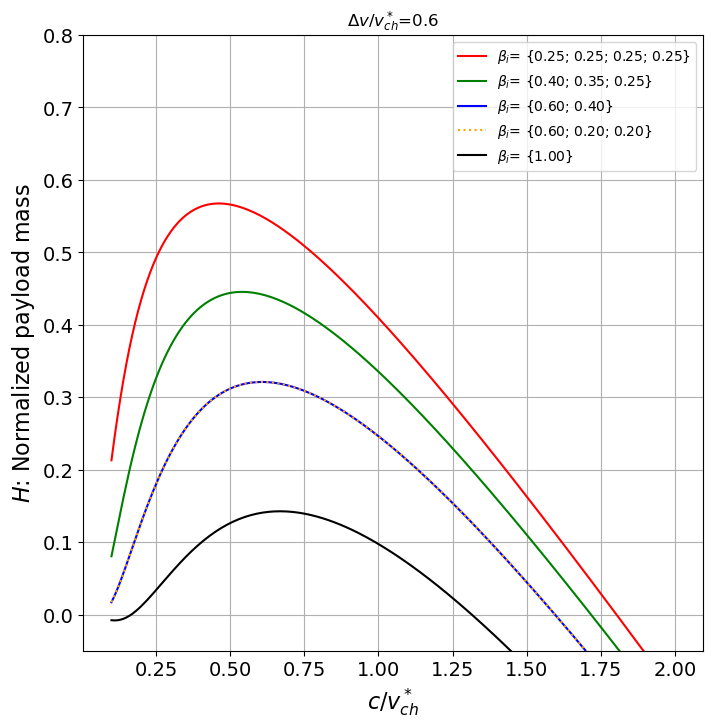

In [10]:
y=0.6
gamma=0.05
x_vec = np.arange(0.1, 2.01, 0.01)

sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([.6, .2,.2]),
                      np.array([1])))
color_list=["r","g","b","orange","k"]


fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):
    Hm_noref=[]
    for x in x_vec:
        Hm_noref.append(payload_mission(x,y,sequence))

    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    marker="-"
    if idx==3:
        marker=":"
    
    plt.plot(x_vec,Hm_noref,marker,color=color_list[idx],label=str)

    
plt.ylim([-.05,.8])
plt.xlabel(r'$c/v_{ch}^*$',fontsize=16)  
plt.ylabel(r'$H$: Normalized payload mass',fontsize=16)   
plt.title(rf"$\Delta v/v_{{ch}}^*$={y}")
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

plt.savefig("figures/electric/H_nopenalty.png")



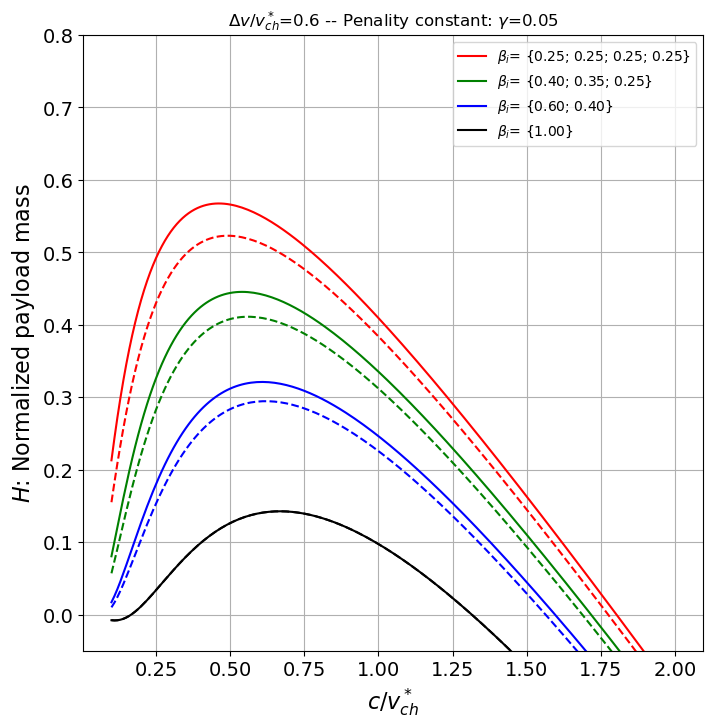

In [11]:
y=0.6
gamma=0.05
x_vec = np.arange(0.1, 2.01, 0.01)

sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1])))

color_list=["r","g","b","k"]


fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    Hm_noref=[]
    Hm_ref=[]

    for x in x_vec:
        Hm_noref.append(payload_mission(x,y,sequence))
        Hm_ref.append(payload_mission_penalty(x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,Hm_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,Hm_ref,"--",color=color_list[idx])
    
plt.ylim([-.05,.8])
plt.xlabel(r'$c/v_{ch}^*$',fontsize=16)  
plt.ylabel(r'$H$: Normalized payload mass',fontsize=16)    
plt.title(rf"$\Delta v/v_{{ch}}^*$={y} -- Penality constant: $\gamma$={gamma}")
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

plt.savefig("figures/electric/H_penalty.png")



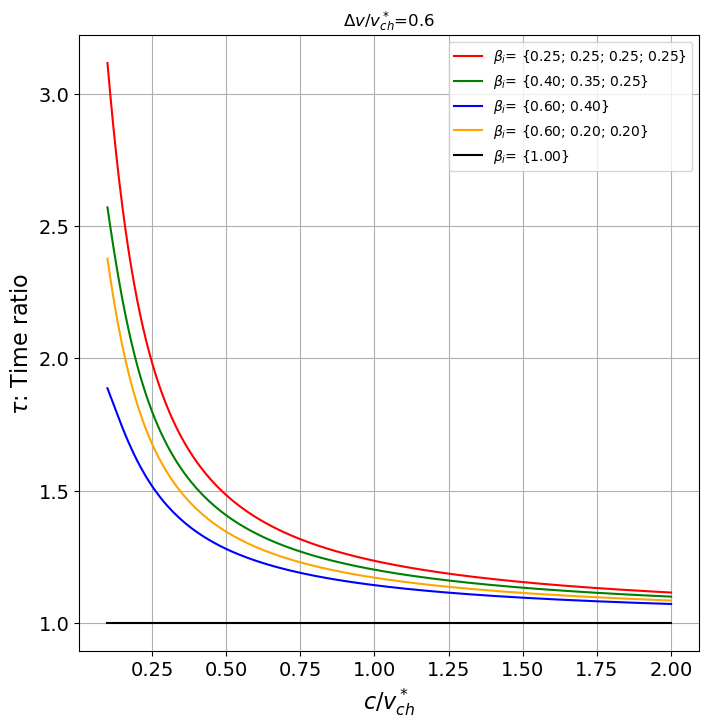

In [12]:
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([.6, .2,.2]),
                      np.array([1])))
color_list=["r","g","b","orange","k"]

fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    tau_noref=[]
    tau_ref=[]


    for x in x_vec:
        tau_noref.append(time_coeff(x,y,sequence))
        tau_ref.append(time_coeff_penalty (x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,tau_noref,"-",color=color_list[idx],label=str)

    
plt.xlabel(r'$c/v_{ch}^*$',fontsize=16)  
plt.ylabel(r'$\tau$: Time ratio',fontsize=16)  
plt.title(rf"$\Delta v/v_{{ch}}^*$={y}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("figures/electric/tau_nopenalty.png")

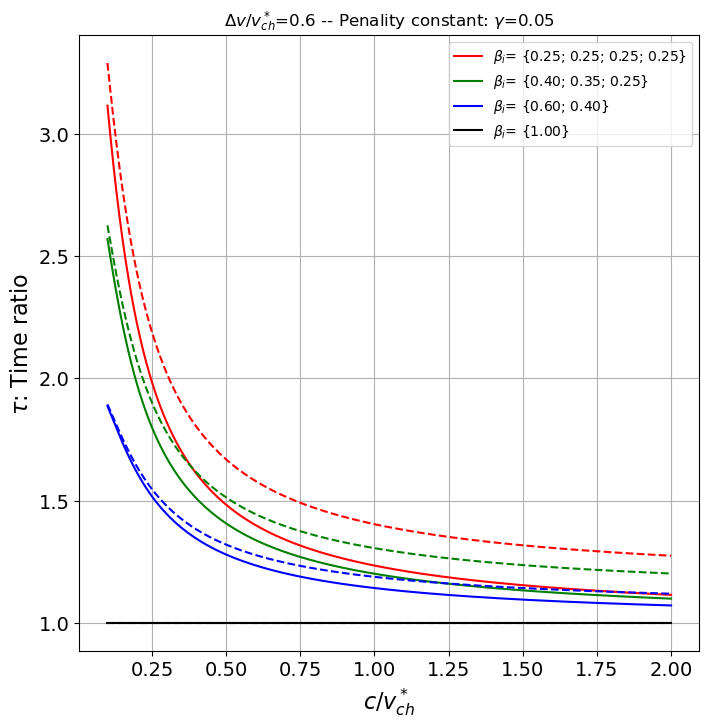

In [13]:
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1]),
                   ))
color_list=["r","g","b","k"]

fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):

    tau_noref=[]
    tau_ref=[]


    for x in x_vec:
        tau_noref.append(time_coeff(x,y,sequence))
        tau_ref.append(time_coeff_penalty (x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,tau_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,tau_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$c/v_{ch}^*$',fontsize=16)  
plt.ylabel(r'$\tau$: Time ratio',fontsize=16)    
plt.title(rf"$\Delta v/v_{{ch}}^*$={y} -- Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("figures/electric/tau_penalty.png")

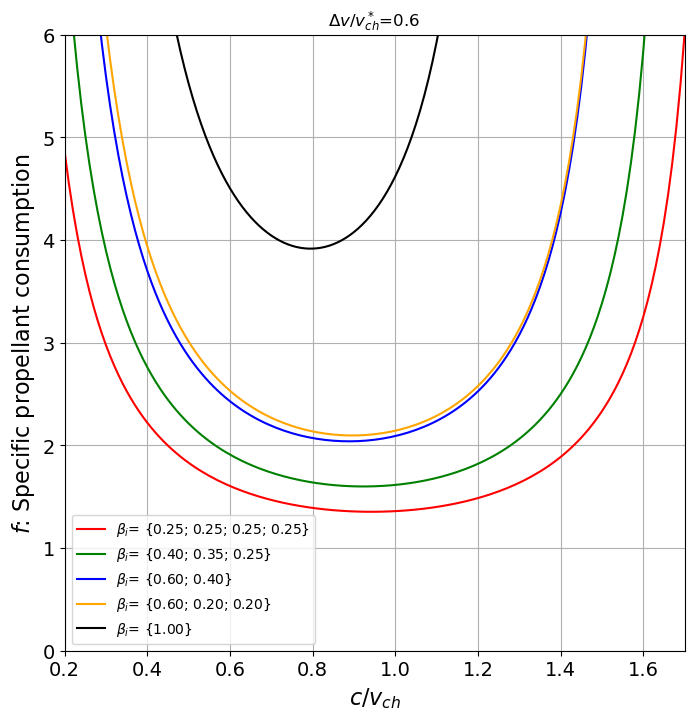

In [14]:
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([.6, .2,.2]),
                      np.array([1])))
color_list=["r","g","b","orange","k"]



x_vec = np.arange(0.1, 2.01, 0.01)

x_vec_list = [(np.arange(0.1, 2.01, 0.01)), 
                     np.arange(0.1, 1.65, 0.01), 
                      np.arange(0.1, 1.5, 0.01), 
                      np.arange(0.1, 1.5, 0.01), 
                     np.arange(0.1, 1.2, 0.01)]



fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):
    
    f_noref=[]
    f_ref=[]
    
    x_vec=x_vec_list[idx]
    
    for x in x_vec:
        f_noref.append(specific_fuel_cons(x,y,sequence))
        f_ref.append(specific_fuel_cons_penalty(x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,f_noref,"-",color=color_list[idx],label=str)
    
    
plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'$f$: Specific propellant consumption',fontsize=16)    
plt.title(rf"$\Delta v/v_{{ch}}^*$={y}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0.2,1.7])
plt.ylim([0,6])
plt.legend(loc="best")
plt.savefig("figures/electric/f_nopenalty.png")

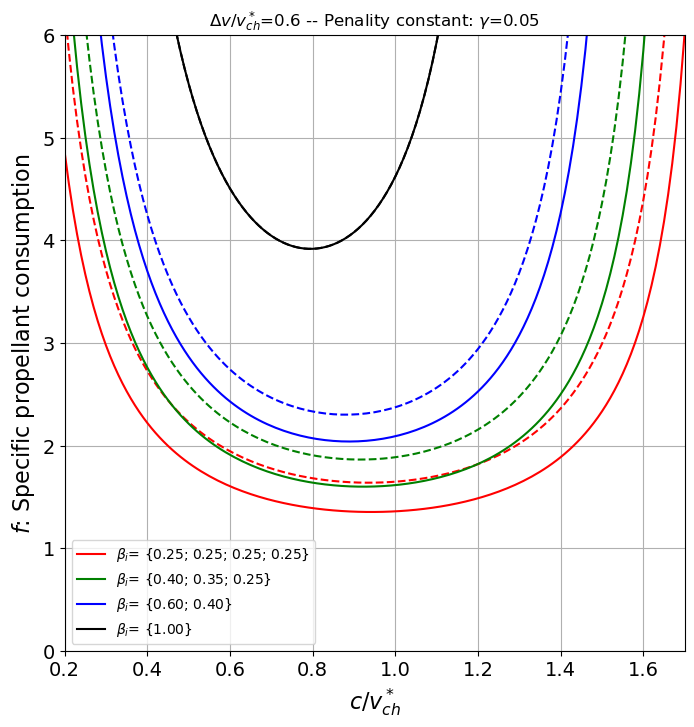

In [15]:
sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1]),
                   ))
color_list=["r","g","b","k"]


x_vec = np.arange(0.1, 2.01, 0.01)

x_vec_list = [(np.arange(0.1, 2.01, 0.01)), 
                     np.arange(0.1, 1.65, 0.01), 
                      np.arange(0.1, 1.5, 0.01), 
                     np.arange(0.1, 1.2, 0.01)]



fig=plt.figure(figsize=(8,8))
for idx, sequence in enumerate(sequence_list):
    
    f_noref=[]
    f_ref=[]
    
    x_vec=x_vec_list[idx]
    
    for x in x_vec:
        f_noref.append(specific_fuel_cons(x,y,sequence))
        f_ref.append(specific_fuel_cons_penalty(x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,f_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,f_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$c/v_{ch}^*$',fontsize=16)  
plt.ylabel(r'$f$: Specific propellant consumption',fontsize=16)    
plt.title(rf"$\Delta v/v_{{ch}}^*$={y} -- Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0.2,1.7])
plt.ylim([0,6])
plt.legend(loc="best")
plt.savefig("figures/electric/f_penalty.png")

# Optimization of $H_m$ as a function of $n$

In [16]:
def max_H(x,y,n):
    return np.exp(-(1/n) *y/x) -x**2 *(1-np.exp(-y/x))

def analytical_lim_H(x,y):
    return 1 -x**2 *(1-np.exp(-y/x))



def specific_fuel_cons_uniformrefueling(x,y,n):
    mp_refuel= n* (1-np.exp(-(1/n) *y/x))
    Hm=max_H(x,y,n)
    f=mp_refuel/Hm
    return f

In [17]:
x=1
y=0.8
n=np.arange(1,100,1)
H=max_H(x,y,n)
limit=analytical_lim_H(x,y)

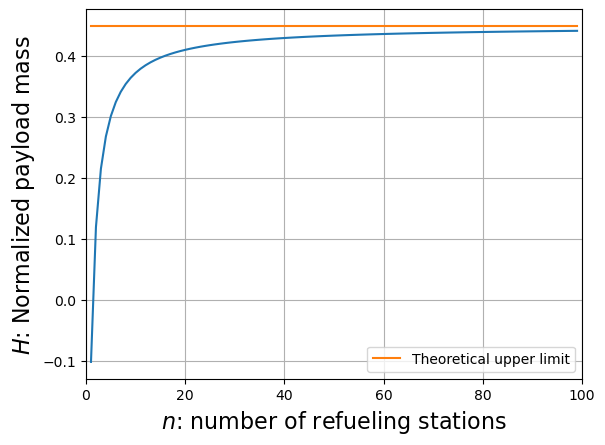

In [18]:
fig=plt.plot(figsize=(8,8))
plt.plot(n,H)
plt.plot(np.array([n[0],n[-1]]),np.array([limit,limit]),label="Theoretical upper limit")

plt.xlabel(r'$n$: number of refueling stations',fontsize=16)  
plt.ylabel(r'$H$: Normalized payload mass',fontsize=16)   
plt.xlim([0,n[-1]+1])
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig("figures/electric/H_vs_n.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


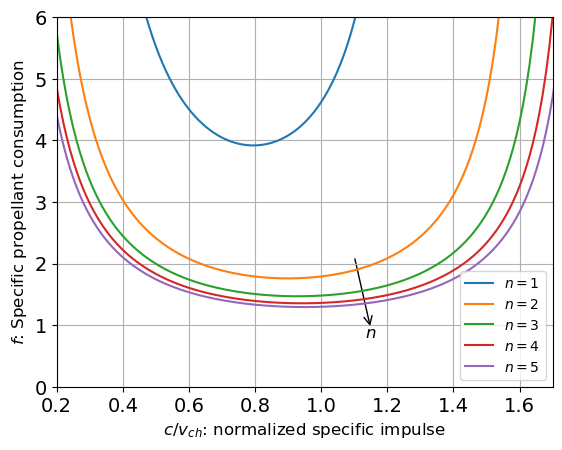

In [20]:
x_vec_list = [(np.arange(0.1, 1.21, 0.01)), 
                     np.arange(0.1, 1.6, 0.01), 
                      np.arange(0.1, 3, 0.01), 
                      np.arange(0.1, 1.8, 0.01), 
                     np.arange(0.1, 1.9, 0.01)]



y=0.6
n_vec=np.arange(1,5.1,1)

fig=plt.plot(figsize=(8,8),dpi=150)
for idx, n in enumerate(n_vec):
    x_vec=x_vec_list[idx]
    f=specific_fuel_cons_uniformrefueling(x_vec,y,n)
    plt.plot(x_vec,f,label=rf"$n=${n:.0f}")



start_point = (1.1, 2.12)  # Set the start point of the double arrow
end_point = (1.15, 0.94)    # Set the end point of the double arrow
arrow = FancyArrowPatch(start_point, end_point, arrowstyle='->',lw=1, mutation_scale=15, color='k')
plt.gca().add_patch(arrow)
plt.text(1.15, 0.750, r"$n$", ha='center', va='bottom', color='k', fontsize=12)




plt.xlim([0.2,1.7])
plt.ylim([0,6])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc="lower right")
#plt.title(rf"$\Delta v/v_{{ch}}^*$={y}")

plt.xlabel(r'$c/v_{ch}$: normalized specific impulse',fontsize=12)  
plt.ylabel(r'$f$: Specific propellant consumption',fontsize=12) 

plt.grid(True)
plt.savefig("figures/electric/f_nopenalty.eps",bbox_inches='tight')